# Tutorial Basics Noten Part 2: Statistik

Inhaltsverzeichnis: 
1. Abfrage von Metadaten und einfachen statischen Angaben
2. Häufigkeiten: Tonhöhen, Tonhöhenklassen, Tondauern, metrische Akzente
3. Zweidimensionale Häufigkeitsverteilungen
4. Intervalle im einstimmigen Verlauf 
5. Aufgaben

In diesem Tutorial werden Sie anhand von Musikbeispielen einfache computergestützten Möglichkeiten statistischer Abfragen kennenlernen. 

Das Durcharbeiten und Nachvollziehen des Tutoriums soll es Ihnen ermöglichen, mit den vorgestellten computergestützten Methoden eigene Musikbeispiele (Notendateien) zu untersuchen und Vergleiche zwischen verschiedenen Musikstücken durchzuführen. 
Dabei geht es immer auch um die Formulierung bestimmter analytischer Fragestellungen und die Interpretation der jeweiligen Ergebnisse.

In [1]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))

import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mit diesen Befehlen wird nicht nur 'music21', 
# sondern darüber hinaus die Bibliotheken 'numpy' und 'pandas' für statische Auswertungen 
# sowie 'matplotlib' für grafische Darstellungen geladen. 

# mit den folgenden Befehlen wird die Formtierung für die Tabellen festgelegt, 
# die weiter unten dargestellt werden: 

pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

environment.set('autoDownload', 'allow')

# Und zuletzt Befehle für den Datenexport: 




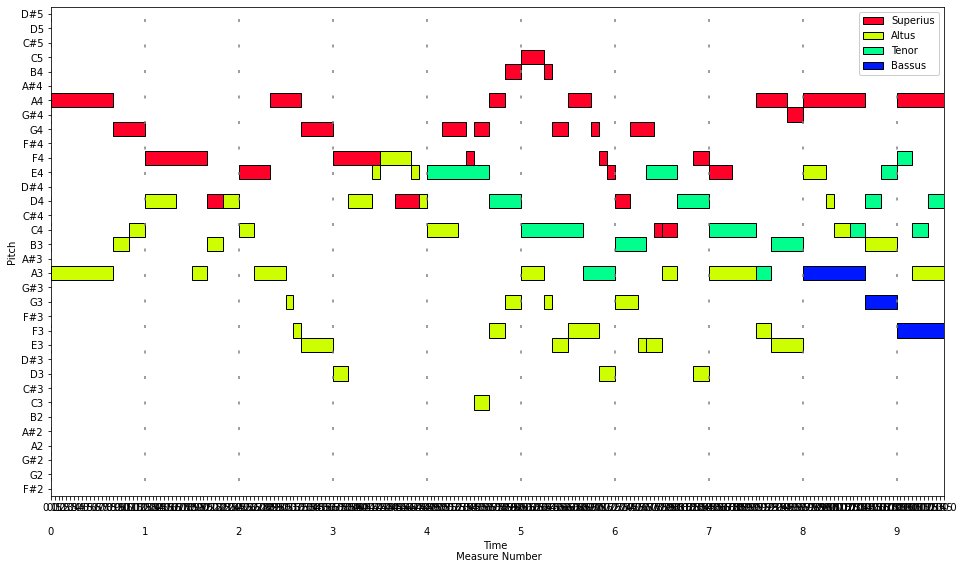

In [2]:
xml_file = 'PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml'
m_df = mp.parse.with_xml_file(file_name=xml_file,
                              plot_pianoroll=True,
                              save_at=None,
                              save_file_name=None,
                              do_save=False, 
                              x_axis_res=2)

In [3]:
m_df

,Offset,Duration,Pitch,Octave,MIDI,Measure,Voice,PartID,Part Name,Chord Tags,Tie Type,Grace Tag
0,0.0,8.0,A,4,69.0,1,0,1,Superius,none,none,none
1,8.0,4.0,G,4,67.0,1,0,1,Superius,none,none,none
2,12.0,8.0,F,4,65.0,2,0,1,Superius,none,none,none
3,20.0,4.0,D,4,62.0,2,0,1,Superius,none,none,none
4,24.0,4.0,E,4,64.0,3,0,1,Superius,none,none,none
5,28.0,4.0,A,4,69.0,3,0,1,Superius,none,none,none
6,32.0,4.0,G,4,67.0,3,0,1,Superius,none,none,none
7,36.0,8.0,F,4,65.0,4,0,1,Superius,none,none,none
8,44.0,4.0,D,4,62.0,4,0,1,Superius,none,none,none
9,48.0,2.0,E,4,64.0,5,0,1,Superius,none,none,none


Man kann sich das Stück auch anhören - allerdings nur in einer Version mit MIDI-Klängen (und nur in den Browsern Chrome und Firefox): 

### 1. Abfrage von Metadaten und einfachen statischen Angaben

Alle in der MusicXML gespeicherte Metadaten zum untersuchten Werk (Komponist, Werktitel, Entstehungsjahr, usw.) können mit dem folgenden Befehl angezeigt werden:

Nun die einfachen statistischen Abfragen aus dem letzten Tutorial: Anzahl der Stimmen, Anzahl der Töne (insgesamt und pro Stimmen), Länge in Takten, Ambitus, die wir bereits im Grundlagen-Tutorial kennengelernt haben:

In [4]:
v = m_df[['PartID','Part Name']].drop_duplicates().to_numpy()
mp.utils.display_table(data=v, 
                       columns=['Part ID', 'Part Names'])

# Anzahl der Stimmen
# 'local' wird als Name (Variable) für die geladene ('geparste') Notendatei gewählt

Part ID,Part Names
1,Superius
2,Altus
3,Tenor
4,Bassus


In [5]:
m = m_df['Measure'].to_numpy(dtype=int)
max(m)
# Länge in Takten

58

In [6]:
n_notes, c_notes = np.unique(m_df['PartID'], return_counts=True)
data = [[i, c] for i, c in zip(n_notes, c_notes) ]
mp.utils.display_table(data=data, 
                       columns=['Part ID', '# Notes'])

# Anzahl der Töne per Stimme

Part ID,# Notes
1,167
2,174
3,139
4,122


In [7]:
# music.analyze('ambitus')
# Ambitus (alle Stimmen)

In [8]:
ambitus = mp.analyse.ambitus(m_df)
mp.utils.display_table(data=ambitus, 
                       columns=['Part ID', 'min', 'max', 'difference in semitones'])
#a = len(music.getElementsByClass(stream.Part))
#for x in range(a):
#  print(music.parts[x].analyze('ambitus'))
# Ambitus per Stimme

Part ID,min,max,difference in semitones
1,57,74,17
2,48,67,19
3,50,65,15
4,43,57,14


### 2. Häufigkeiten: Tonhöhen, Tonhöhenklassen, Tondauern

Zur Charakterisierung einzelner Musikstücke und zum Vergleich zwischen verschiedenen Musikstücken kann es sinnvoll sein, die Häufigkeit bestimmter Elemente (Tonhöhen, Dauernwerte, Akkorde etc.) zu bestimmen. Für solche Fragen lassen Häufigkeitstabellen und grafische Darstellungen, sog. Histogramme erstellen. 

#### 2.1 Tonhöhen

Welche Töne tauchen wie häufig auf? Wie diatonisch ist der Tonraum der Missa, wie viele zusätzliche chromatische Töne tauchen auf?

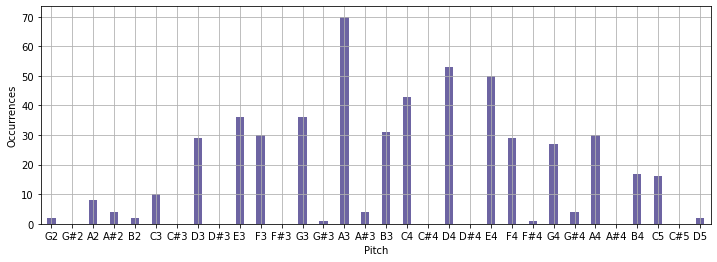

MIDI,Occurrences
43,2
45,8
46,4
47,2
48,10
50,29
52,36
53,30
55,36
56,1


In [9]:
%matplotlib inline

pitch_hist = mp.analyse.pitch_histogram(m_df, do_plot=True, visulize_midi_range=None)
mp.utils.display_table(data=pitch_hist, 
                       columns=['MIDI', 'Occurrences'])
# ToDo: pitch cols

Was können wir beobachten? Die Musik ist eindeutig diatonisch; die zusätzlichen Töne (F#, G# und Bb) sind dagegen äußerst selten. 

Durch den folgenden Befehl wird eine Liste der Tonhöhenhäufigkeiten angezeigt und als csv-Datei exportiert (csv = comma separated variables; lesbar und weiterverarbeitbar u.a. in Excel oder im Text-Editor). Durch den Export lassen sich Tabellen zum Stückvergleich und zur Korpusanalyse generieren. Die csv-Datei wird in dem Ordner gespeichert, den Sie in Ihren Settings als "settings['directoryScratch']" festgelegt haben und kann mit einem Texteditor oder einem Tabellenkalkulationsprogramm (z.B. Excel) geöffnet werden. 

#### 2.2 Tonhöhenklassen

Die Tönhöhen lassen sich in einem zweiten Schritt zu Tonhöhenklassen zusammenfassen. Dadurch wird das Ergebnis übersichtlicher. 

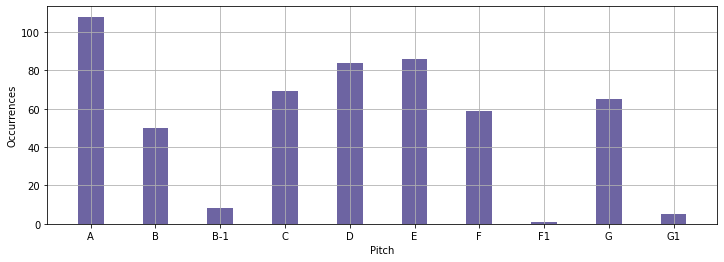

Pitch Class,Occurrences
A,108
B,50
B-1,8
C,69
D,84
E,86
F,59
F1,1
G,65
G1,5


In [10]:

pitchclass_hist = mp.analyse.pitch_class_histogram(m_df, do_plot=True)

mp.utils.export_as_csv(data=pitchclass_hist, 
                       columns=['Pitch Class', 'Occurrences'],
                       save_file_name ='pitch_class_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Durch folgenden Befehlsfolge können die Häufigkeiten der einzelnen Tonhöhenklassen in einer Liste angezeigt und als csv-Datei exportiert werden: 

#### 2.3 Tondauern 

Welche Dauernwerte verwendet Josquin in seiner Missa und wie häufig kommen diese jeweils vor?

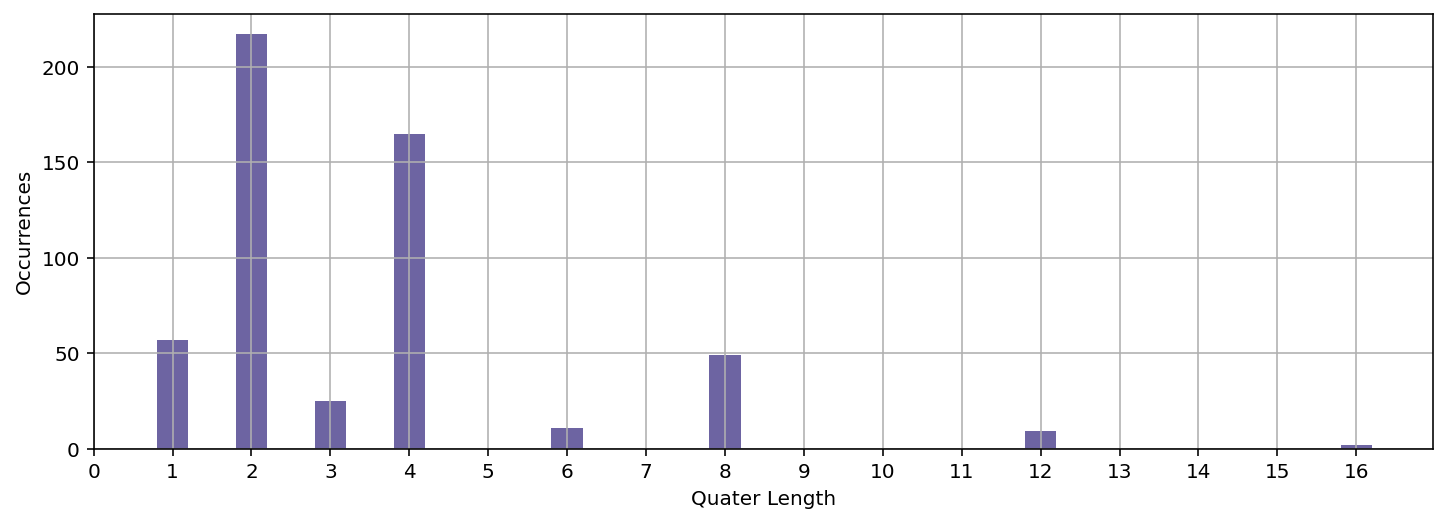

Duration,Occurrences
1.0,57
2.0,217
3.0,25
4.0,165
6.0,11
8.0,49
12.0,9
16.0,2


In [11]:
# Für das Dauernwerte-Histogram muss eine andere Befehlsmethode angewendet werden.
# Der graph-Befehl muss mit dem run-Befehl kombiniert werden. 

quarter_dur_hist = mp.analyse.quarterlength_duration_histogram(m_df, do_plot=True)

mp.utils.export_as_csv(data=quarter_dur_hist, 
                       columns=['Duration', 'Occurrences'],
                       save_file_name ='quarter_duration_hist.csv', 
                       do_save=True,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Die Notenwerte werden als Vielfache einer Viertel (Quarter Lenght) gezählt. 
Der Notentext besteht somit vorwiegend aus Halben (2.0) und Ganzen (4.0); andere Notenwerte sind seltener. 

#### 2.4 Metrische Akzente: Töne auf unterschiedlichen metrischen Positionen 

Wie deutlich wird das Metrum in den einzelnen Stimmen einer Komposition – durch die Platzierung der Töne auf Taktanfängen und den metrisch wichtigen Positionen innerhalb des Taktes (z.B. der Taktmitte oder auf den Viertelpositionen)? Hierzu lässt sich in eine Liste der Häufigkeiten von Tönen auf den verschiedenen metrischen Positionen in den einzelnen Stimmen anzeigen. 

Die metrischen Akzente folgen für die gängigen Taktarten folgender Gewichtung (jeweils für eine Folge von Achtelnoten): im 4/4-Takt: 1.0, 0.125, 0.25, 0.125, 0.5, 0.125, 0.25, 0.125; im   3/4-Takt: 1.0, 0.25, 0.5, 0.25, 0.5, 0.25 usw.  
Das heißt also: Der Taktanfang erhält mit 1.0 das höchste Gewicht. 0.5 = mittleres Gewicht, 0.25 geringeres Gewicht usw.

1. get measure offset vector
2. diff = sub(notes - measure)
3. np.unique(diff)

NameError: name 'music' is not defined

In [ ]:
# Nun werden Histogram und csv-Liste angezeigt und gespeichert. 
bs_int_indi = []
for c_bs_uni in bs_uni:
    l = len(pd_bs.loc[(pd_bs['Beat_Strength']==c_bs_uni)])
    bs_int_indi.append([c_bs_uni, l])
    
    
    
pd_bs_indi_data = export_as_csv(data=bs_int_indi, 
                    columns=['Beat_Strength', 'Occurrence'], 
                    save_at='beat_strength_freq_02.csv',
                    do_print=True, do_return_pd=True)


np_bs_indi_data = pd_bs_indi_data.to_numpy()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(np_bs_indi_data[:,0], np_bs_indi_data[:,1], width=0.5 ,color='darkslateblue', alpha=0.8)
ax2.set_title('Beat Strength')
ax2.set_xlabel('Beat Strength')
ax2.set_ylabel('Occurrence')
plt.show()

Im Falle des "3/1-Taktes" entspricht die 1.0 den Taktanfängen, der zweiten und dritten Ganzen-Position im Takt, die 0.25 den verbleibenden Halb-Positionen. 

### 3. Zweidimensionale Häufigkeitsverteilungen

Wir haben uns bereits die Häufigkeiten von Tonhöhen bzw. Tonhöhenklassen angeschaut. Nun könnte man sagen: Längere Töne haben natürlich mehr Gewicht als kurze Töne oder Töne zwischen den Zählzeiten. Diesen Gedanken können wir weiterverfolgen, indem wir uns kombinierte, ‚doppelte‘ oder ‚bivariate‘ Häufigkeitsverteilungen: Also z.B. die Häufigkeiten der Tonhöhen für jeweils die verschiedenen Dauernwerte oder die Häufigkeiten der Tonhöhenklasse jeweils für die verschiedenen metrischen Positionen. Hierum soll es im Folgenden anhand von zwei Beispielen gehen.  
Beispiel 1: Dauern pro Tonhöhenklassen
Gibt es Unterschiede bei den Dauernwerten bzgl. der verschiedenen Tonhöhenklassen?


In [ ]:
scatter1 = graph.plot.ScatterWeightedPitchClassQuarterLength(music)
scatter1.run()
# (Das log2 auf der x-Achse bedeutet, dass die verschiedenen Notenwerte nicht linear angeordnet sind.)

Was lässt sich aus der Grafik herauslesen?

In [ ]:
# Es gibt eine weitere Darstellungsweise des Verhältnisses von Tonhöhen bzw. Tonhöhenklassen und Tondauern:
# Ein 3-dimensionales Histogramm:
music.plot('3dbars', 'pitch', 'quarterLength')
music.plot('3dbars', 'pitchclass', 'quarterLength')

Beispiel 2: Töne auf den unterschiedlich akzentuierten metrischen Positionen (s. oben, 2.4) im Verhältnis zu Tonhöhenklassen. Hierzu ist wieder ein etwas komplexerer Befehl notwendig: 

In [ ]:
n_uni_int_dict = dict(zip(n_uni, np.arange(len(n_uni))))
bs_uni_int_dict = dict(zip(bs_uni, np.arange(len(bs_uni))))


for c_n_uni in n_uni:
    for c_bs_uni in bs_uni:
        l = len(pd_bs.loc[(pd_bs['Notes']==c_n_uni) & (pd_bs['Beat_Strength']==c_bs_uni)])
        l_bs.append([c_n_uni, c_bs_uni, l])

pd_bs_data = export_as_csv(data=l_bs, 
                    columns=['Note' ,'Beat_Strength', 'Occurrence'], 
                    save_at='beat_strength_freq.csv',
                    do_print=True, do_return_pd=True)
np_bs_data = pd_bs_data.to_numpy()


# --------- plotting -------
#print("Dict",n_uni_int_dict)
#print("Dict",bs_uni_int_dict)
plt_bs_data = np.zeros(np.shape(pd_bs_data))

for i in range(np.shape(np_bs_data)[0]):
    plt_bs_data[i][0] = n_uni_int_dict[np_bs_data[i][0]]
    plt_bs_data[i][1] = bs_uni_int_dict[np_bs_data[i][1]]
    plt_bs_data[i][2] = np_bs_data[i][2]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm          

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
numele= np.shape(np_bs_data)[0]        

x = plt_bs_data[:,0]    
y = plt_bs_data[:,1]
z = np.zeros(numele)

dx = 0.5 * np.ones(numele)
dy = 0.3 * np.ones(numele)
dz = plt_bs_data[:,2]


cmap = cm.get_cmap('jet') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax1.set_xticks(np.arange(len(n_uni)))
ax1.set_yticks(np.arange(len(bs_uni)))


ax1.bar3d(x, y, z, dx, dy, dz, color=rgba, zsort='average')

ax1.set_xticklabels(list(n_uni))
ax1.set_yticklabels([str(i) for i in bs_uni])
ax1.set_xlabel('Notes')
ax1.set_ylabel('Beat Strength')
ax1.set_zlabel('Occurrence')
#plt.savefig("Your_title_goes_here")

### 4. Intervalle im einstimmigen Verlauf 

Gehen wir nun zurück zum Beispiel von Josquin. Wie häufig kommen bestimmte Intervallschritte in den einzelnen Stimmen vor? Sind da alle Stimmen ähnlich gelagert – oder gibt es z.B. im Bass mehr Sprünge, in den Mittelstimmen mehr Schritte? 

Die Beantwortung dieser Frage kann bei music21 nur in mehreren Schritten erfolgen. 

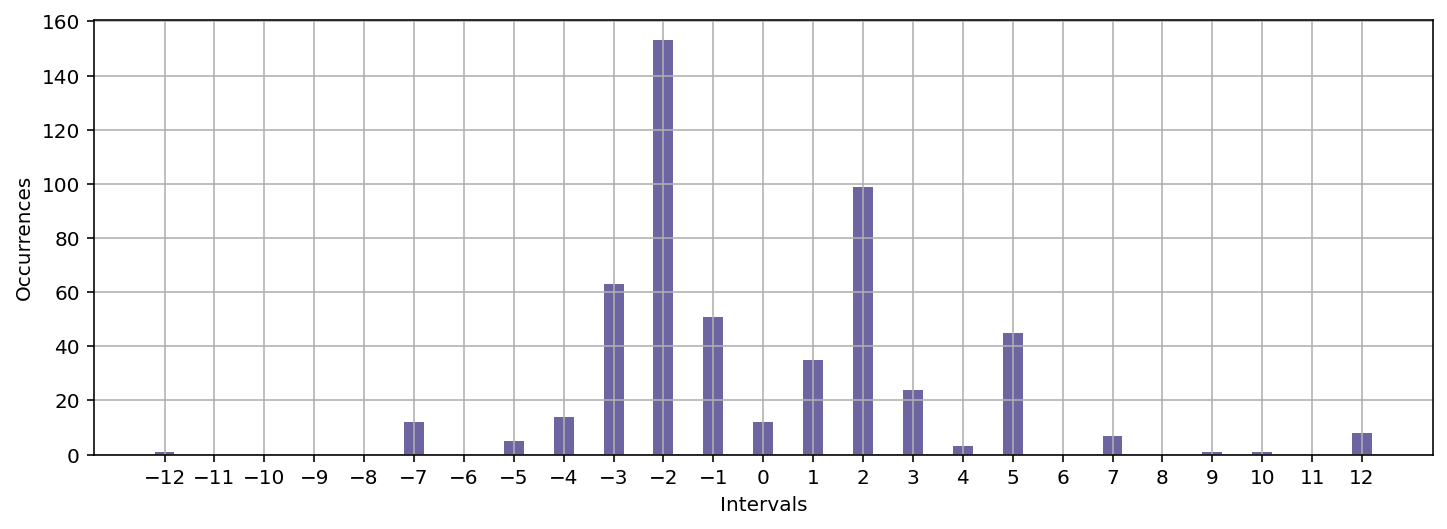

Interval,Occurrences
-12,1
-7,12
-5,5
-4,14
-3,63
-2,153
-1,51
0,12
1,35
2,99


In [14]:
# Zunächst muss eine Stimme ausgewählt und mit einer neuen Variablen bezeichnet werden. 
# Superius = 0, Altus = 1, Tenor = 2, Bassus = 3
# Wählen wir die Bassstimme. 

interval_hist = mp.analyse.interval(m_df, part=1,do_plot=True)

mp.utils.export_as_csv(data=interval_hist, 
                       columns=['Interval', 'Occurrences'],
                       save_file_name ='interval.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Nun der Vergleich mit der Altus-Stimme. Was lässt sich hieraus über die Art der Fortschreitung der beiden Stimmen sagen? Ist sie ähnlich oder unterschiedlich?

Mit den folgenden Befehlen lässt sich die Liste der Intervallhäufigkeiten anzeigen exportieren bzw. als Histogramm anzeigen.

### 5. Aufgaben

Vergleichende statistische Abfragen über mehrere Stücke:

Wir haben uns die Ergebnisse bislang nur anhand jeweils eines Stückes angeschaut. Wie stellt sich nun aber die Lage dar, wenn wir mehrere Stücke, z.B. mehrere Sätze von Josquin, miteinander – und mit den Stücken eines seiner Zeitgenossen – vergleichen? Gibt es da tatsächlich stilistische Regelmäßigkeiten – oder stilistische Unterschiede?

Wählen Sie Kompositionen Ihrer Wahl (verschiedene Gattungen, Komponisten und Epochen) und vergleichen Sie diese Stücke hinsichtlich der Häufigkeiten von Tonhöhen, Tonhöhenklassen, Notenwerten und Intervallen. Beschreiben Sie die Ergebnisse!